# Pymaceuticals Inc.
---

### Analysis

1.  Bar graph shows highest number of mouse used for the testing of Ramicane and Capomuline regimen.
2. Mice treated with Ramicane and Capomuline has lower tumor size.
3. Average tumor volumne change when the mouse weight changes as its shown in the regression analysis.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint", ]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
    

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mouse)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse=clean_df["Mouse ID"].value_counts()
clean_number_of_mouse=len(clean_mouse)
clean_number_of_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_deviation = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : variance,
    "Tumor Volume Std. Dev." : std_deviation,
    "Tumor Volume Std. Err." : std_sem
    })
summary_df

C:\Users\rajin\AppData\Local\Temp\ipykernel_14352\383087033.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\rajin\AppData\Local\Temp\ipykernel_14352\383087033.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\rajin\AppData\Local\Temp\ipykernel_14352\383087033.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sele

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summury_df2 = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summury_df2

C:\Users\rajin\AppData\Local\Temp\ipykernel_14352\3200703058.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summury_df2 = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

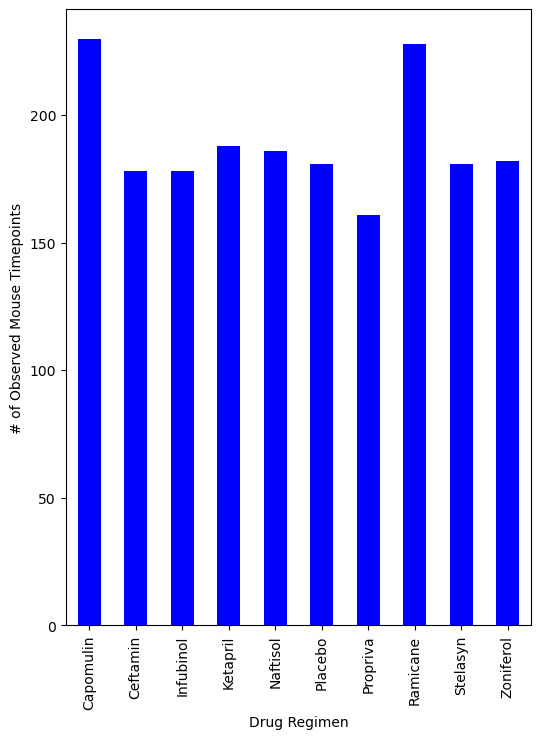

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_for_each_regimen = combined_df.groupby("Drug Regimen").count()["Mouse ID"]
count_chart = total_rows_for_each_regimen.plot(kind='bar', color="b", figsize=(6,8))
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

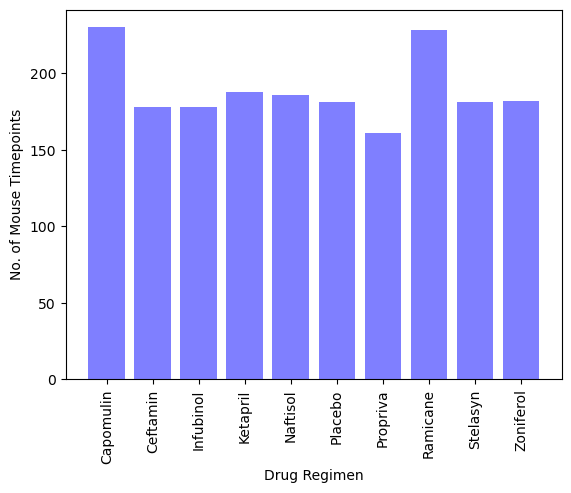

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

no_of_mouse_for_each_regimen = (combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(total_rows_for_each_regimen))

plt.bar(x_axis, no_of_mouse_for_each_regimen, color='b', alpha=0.5)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mouse Timepoints")
plt.show()

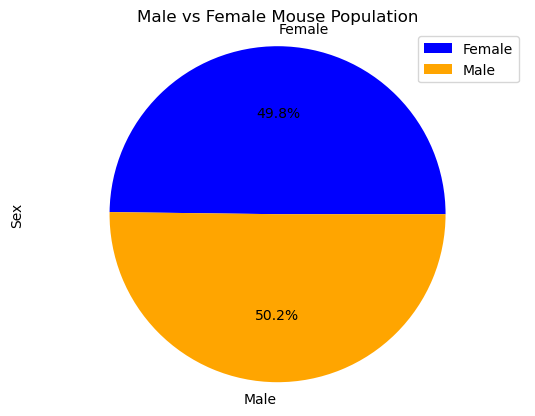

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouby_mouse_gender = combined_df.groupby(["Mouse ID","Sex"])
mouse_gender_df = pd.DataFrame(grouby_mouse_gender.size())
total_count_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
total_count_gender.columns = ["Total Count"]
total_count_gender["Percentage of Sex"] = (100*(total_count_gender["Total Count"]/total_count_gender["Total Count"].sum()))

colors = ["blue", "orange"]
total_count_gender.plot.pie(y="Total Count", autopct="%1.1f%%", colors = colors)
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

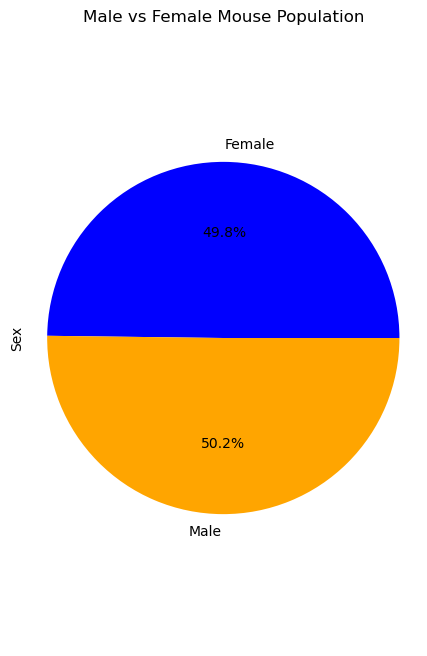

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=["Female", "Male"]
sizes = [49.8,50.2]
colors=["blue", "orange"]
fig1, ax1 = plt.subplots(figsize=(5, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_Capomulin = combined_df.loc[combined_df["Drug Regimen"]== "Capomulin"]
regimen_Ramicane = combined_df.loc[combined_df["Drug Regimen"]== "Ramicane"]
regimen_Infubinol = combined_df.loc[combined_df["Drug Regimen"]== "Infubinol"]
regimen_Ceftamin = combined_df.loc[combined_df["Drug Regimen"]== "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_Capomulin = regimen_Capomulin.groupby(["Mouse ID"]).max()["Timepoint"]
final_tumor_volume_Ramicane = regimen_Ramicane.groupby(["Mouse ID"]).max()["Timepoint"]
final_tumor_volume_Infubinol = regimen_Infubinol.groupby(["Mouse ID"]).max()["Timepoint"]
final_tumor_volume_Ceftamin = regimen_Ceftamin.groupby(["Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_final_df = pd.DataFrame(final_tumor_volume_Capomulin)
Capomulin_final_df
merging_capomulin = pd.merge(Capomulin_final_df, combined_df, on =("Mouse ID", "Timepoint"))
merging_capomulin.head()

Ramicane_final_df = pd.DataFrame(final_tumor_volume_Ramicane)
Ramicane_final_df
merging_ramicane = pd.merge(Ramicane_final_df, combined_df, on =("Mouse ID", "Timepoint"))
merging_ramicane.head()

Infubinol_final_df = pd.DataFrame(final_tumor_volume_Infubinol)
Infubinol_final_df
merging_Infubinol = pd.merge(Infubinol_final_df, combined_df, on =("Mouse ID", "Timepoint"))
merging_Infubinol.head()

Ceftamin_final_df = pd.DataFrame(final_tumor_volume_Ceftamin)
Ceftamin_final_df
merging_Ceftamin = pd.merge(Ceftamin_final_df, combined_df, on =("Mouse ID", "Timepoint"))
merging_Ceftamin.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = combined_df.loc[combined_df["Drug Regimen"]==i]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    first_quart = quartiles[0.25]
    last_quart = quartiles[0.75]
    IQR = last_quart - first_quart
    lower_bound = first_quart - (1.5 * IQR)
    upper_bound = last_quart + (1.5 * IQR)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(f"{i}'s potential outliers:{outliers}")


Capomulin's potential outliers:18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


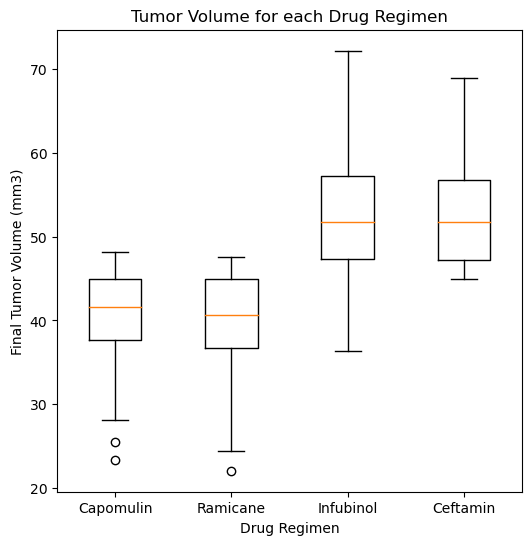

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots(figsize=(6,6))
ax.set_title("Tumor Volume for each Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")
ax.boxplot(tumor_vol_data, labels=treatments,vert=True)
plt.show()

## Line and Scatter Plots

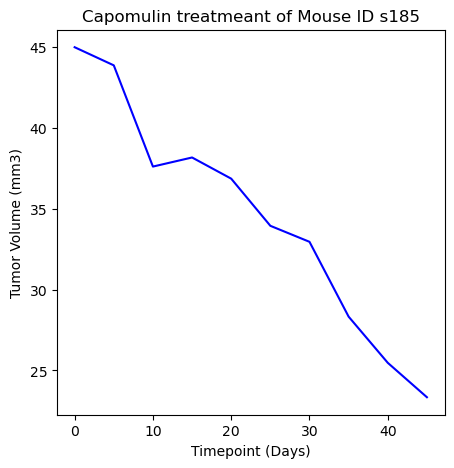

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
capomulin_data

mouse_treated_capomulin = capomulin_data.loc[capomulin_data["Mouse ID"]=="s185"]
mouse_treated_capomulin

x_axis = mouse_treated_capomulin["Timepoint"]
y_axis = mouse_treated_capomulin["Tumor Volume (mm3)"]

fig1,ax = plt.subplots(figsize=(5,5))
plt.title("Capomulin treatmeant of Mouse ID s185")
plt.plot(x_axis, y_axis, color="blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



C:\Users\rajin\AppData\Local\Temp\ipykernel_14352\196866893.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_volume_capomulin = capomulin_data.groupby(['Mouse ID']).mean()


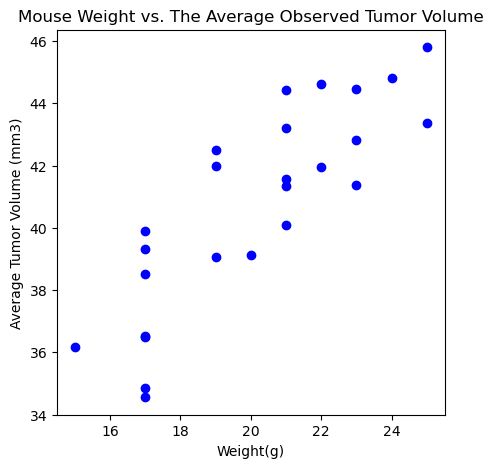

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_volume_capomulin = capomulin_data.groupby(['Mouse ID']).mean()
avg_volume_capomulin

fig1,ax = plt.subplots(figsize=(5,5))
plt.scatter(avg_volume_capomulin["Weight (g)"],avg_volume_capomulin["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. The Average Observed Tumor Volume")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


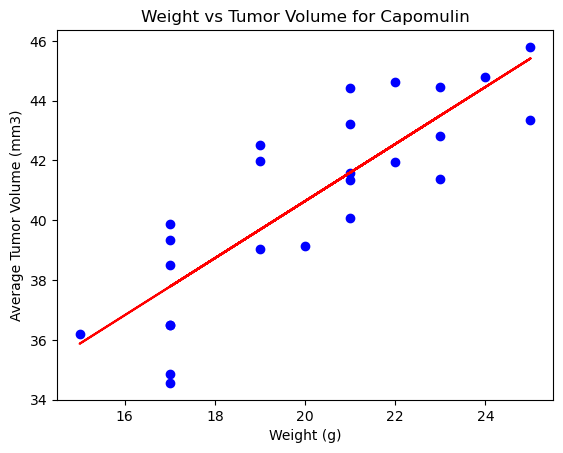

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_volume_capomulin["Weight (g)"], avg_volume_capomulin["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(avg_volume_capomulin["Weight (g)"], avg_volume_capomulin["Tumor Volume (mm3)"])
regress_values=avg_volume_capomulin["Weight (g)"]* slope + intercept

plt.scatter(avg_volume_capomulin["Weight (g)"],avg_volume_capomulin["Tumor Volume (mm3)"], color = "blue")
plt.plot(avg_volume_capomulin["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()